In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from data.utils import  print_colored

# Study the change of Temperature over the years


Text(0.5, 1.0, 'Temperature')

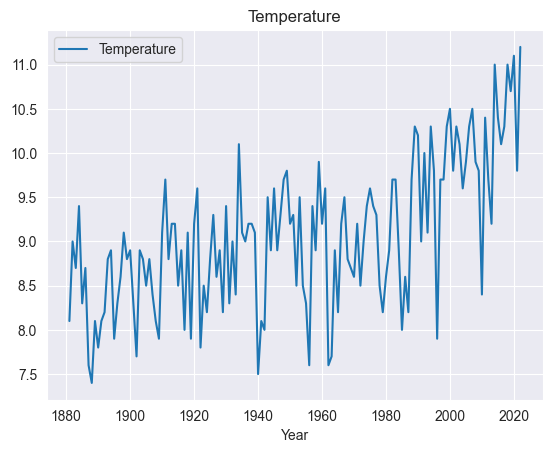

In [76]:
temperature_df =  pd.read_sql_table('temperature', 'sqlite:///../data/dataset.sqlite',coerce_float = True)
temperature_df.set_index('Year', inplace=True)
temperature_df.plot()
plt.title('Temperature')

### We can see a steady raise of average temperature over the years
Let's do a trend analysis on Temperature data by fitting a linear regression line to formally Quantify the trend of the data set

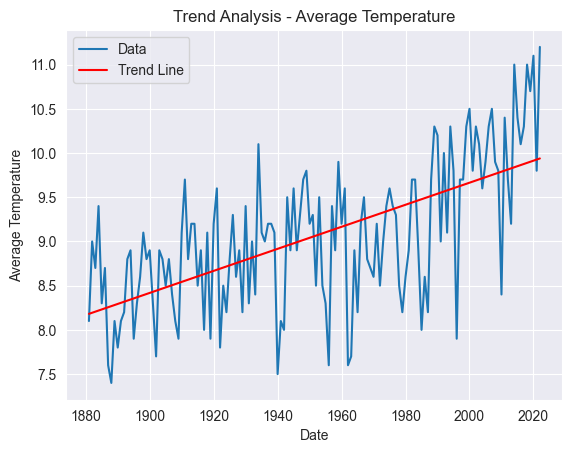

In [77]:
temperature_real_df =  pd.read_sql_table('temperature', 'sqlite:///../data/dataset.sqlite',coerce_float = True)
temperature_df = temperature_real_df.reset_index()
temperature_df['Year'] = pd.to_datetime(temperature_real_df['Year'], format='%Y')
temperature_df.set_index('Year', inplace=True)


x = np.arange(len(temperature_df)).reshape(-1, 1)
y = temperature_df['Temperature'].values.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(x, y)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Plot the original data
plt.plot(temperature_df.index, y, label='Data')

# Plot the linear regression line
regression_line = slope * x + intercept
plt.plot(temperature_df.index, regression_line, color='red', label='Trend Line')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Trend Analysis - Average Temperature')
plt.legend()

# Display the plot
plt.show()


In [78]:
print('slope of the line', slope)

slope of the line [0.01246356]


There is a clear positive trend in the average temperature through the years
We get a slope of 0.01246356 which denotes the rate of change of the average temperature per year.
So the average temperature is increasing by approximately 1.25% each year

## Explore Seasonality
Seasonality Explores seasonal patterns in the average temperature data.
We can check if there is some recurring pattern that could be seen in intervals of years
Are there recurring patterns that occur within each year? Let's analyse if there are specific months or seasons with consistently higher or lower temperatures.
One method to do seasonality analysis is Seasonal Decomposition of Time Series by Loess (STL).
We can do the analysis using the statsmodels library.

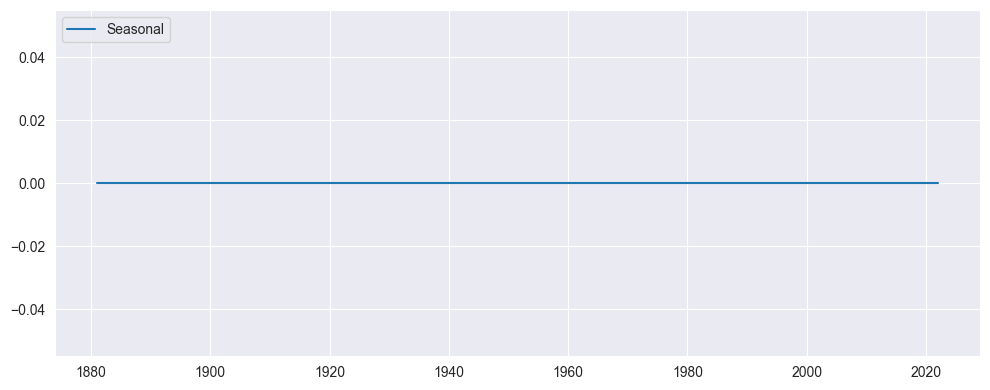

In [79]:
decomposition = sm.tsa.seasonal_decompose(temperature_df['Temperature'], model='additive')

# Extract the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(10, 4))

plt.plot(temperature_df.index, seasonal, label='Seasonal')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

### The model could not see any seasonal trend in our data - which is expected since our time series is per year
If we analyse data per month, we can perhaps deduct some seasonality trend

## Now let's study the yearly temperature differences to study substantial differences compared to previous years
We define a thresholds = 1,1.5,1.75 and see if on which years the average temperature differed significantly from the treshols

In [80]:

diff  = temperature_df['Temperature'].diff()

def get_years_outside_threshold(threshold):
    positive_diff_years = diff[diff > threshold]
    negative_diff_years = diff[diff < -threshold]
    print_colored(f"{len(positive_diff_years)} Years has deviated from previous years by  {threshold} degree", 'red')
    print('Years are' ,positive_diff_years.index.year.values)
    print_colored(f"{len(negative_diff_years)} Years has deviated from previous years by  -{threshold} degree", 'red')
    print('Years are' ,negative_diff_years.index.year.values)

get_years_outside_threshold(1.75)
get_years_outside_threshold(1.5)
get_years_outside_threshold(1)

4 Years has deviated from previous years by  1.75 degree
Years are [1957 1997 2011 2014]
3 Years has deviated from previous years by  -1.75 degree
Years are [1922 1962 1996]
5 Years has deviated from previous years by  1.5 degree
Years are [1934 1957 1997 2011 2014]
4 Years has deviated from previous years by  -1.5 degree
Years are [1922 1940 1962 1996]
15 Years has deviated from previous years by  1 degree
Years are [1903 1910 1918 1920 1930 1934 1943 1957 1964 1988 1994 1997 2011 2014
 2022]
11 Years has deviated from previous years by  -1 degree
Years are [1885 1887 1919 1922 1931 1940 1962 1991 1996 2010 2021]


## Identify Outliers in data
Let's collect a some statistical information from the temperature data to better understand it
We are trying to identify years with unusually high or low average temperature compared to typical range.
We can use z-scores test and define a threshold to identify them and also draw a box plot to figure out big outliers

In [81]:

temperature = temperature_df['Temperature']
year = temperature_df.index
print_colored('TEMPERATURE DATA DESCRIPTION','green')
print_colored(temperature.describe(), 'blue')
z_scores = (temperature - temperature.mean()) / temperature.std()
# Set a threshold to identify outliers (e.g., z-score greater than 2 or less than -2)
threshold = 2.0

# Filter years with z-scores exceeding the threshold
outlier_years = year[np.abs(z_scores) > threshold]
print_colored('OUTLIER  INFO','green')
print_colored("The outlier years falling out of at least 2 standard deviations are :", 'blue')
print_colored(outlier_years.year.values, 'blue')

TEMPERATURE DATA DESCRIPTION
count    142.000000
mean       9.059859
std        0.831137
min        7.400000
25%        8.500000
50%        9.000000
75%        9.675000
max       11.200000
Name: Temperature, dtype: float64
OUTLIER  INFO
The outlier years falling out of at least 2 standard deviations are :
[2014 2018 2020 2022]


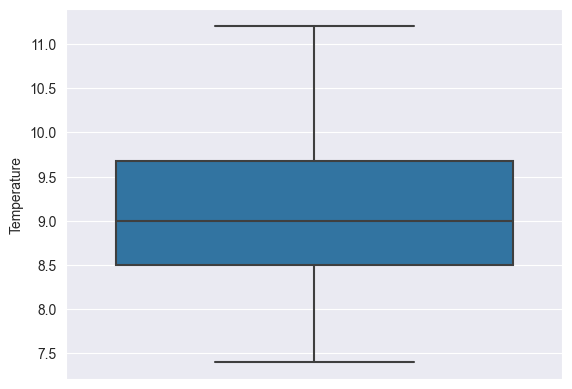

In [82]:
## Box Plot to Identify outliers
sns.boxplot(y=temperature)
plt.show()

Looking at the box plot, it seems like our data does not contain huge outliers

# Environmental Indicators

First data frame is loaded from the local SQLlite DataBase
We check data info to identify missing values and general nature of data

In [161]:
df = pd.read_sql_table('env_indicators', 'sqlite:///../data/dataset.sqlite',coerce_float = True)
df_t= df.T
df_t = df_t.set_axis(df_t.iloc[0], axis=1).drop(df_t.index[0])
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1983 to 2021
Data columns (total 30 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   no2_concentration_urban--Stickstoffdioxidkonzentration                                                  32 non-null     object
 1   Land consumption--Settlement and traffic area                                                           26 non-null     object
 2   nitrogen_oxide_emission--Industry                                                                       7 non-null      object
 3   nitrogen_oxide_emission--Small combustion plants                                                        7 non-null      object
 4   nitrogen_oxide_emission--Traffic                                                                    

Seems like there a quite number of empty values in the data.
We may need to employ suitable interpolation techniques to circumvent that.
Here i am using a simple back fill followed by forward bill to for the missing values to be copied from their neighboring value

In [162]:
# Interpolate Data to fill from historic values
df = df.fillna(method='bfill',axis=1)
df = df.fillna(method='ffill',axis=1)
df_t= df.T
df_t = df_t.set_axis(df_t.iloc[0], axis=1).drop(df_t.index[0])
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1983 to 2021
Data columns (total 30 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   no2_concentration_urban--Stickstoffdioxidkonzentration                                                  39 non-null     object
 1   Land consumption--Settlement and traffic area                                                           39 non-null     object
 2   nitrogen_oxide_emission--Industry                                                                       39 non-null     object
 3   nitrogen_oxide_emission--Small combustion plants                                                        39 non-null     object
 4   nitrogen_oxide_emission--Traffic                                                                    

In [85]:
## Now let's try to find correlation between the maximum average temperature and different environmental indicators

In [86]:
correlation_matrix = df_t.corr()
correlation_with_temperature = correlation_matrix['temperature--Temperature']

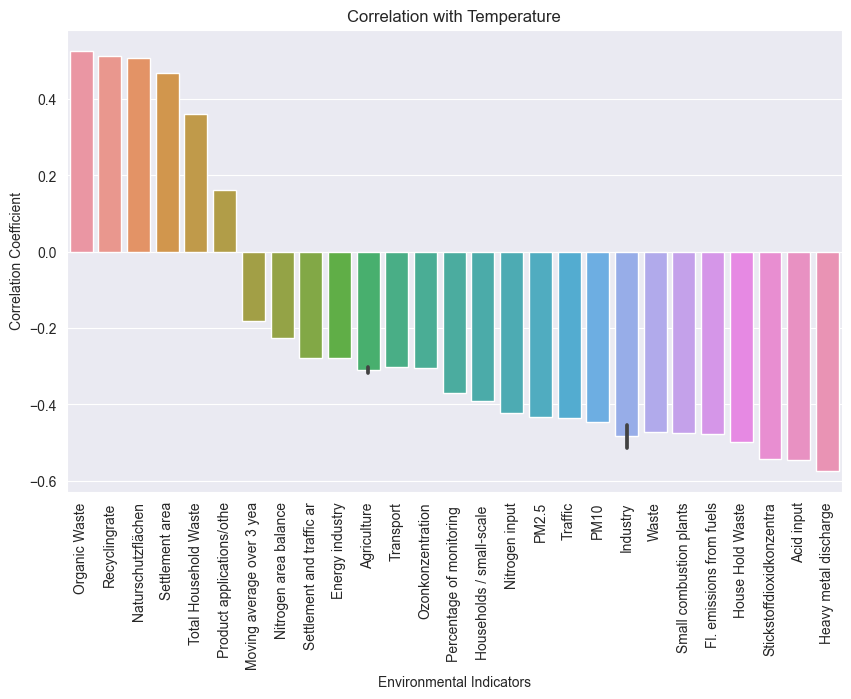

In [87]:
sorted_correlations = correlation_with_temperature.sort_values(ascending=False)
plt.figure(figsize=(10, 6))  # Set the figure size
formatted_cols = [element.split("--")[-1][0:25] for element in sorted_correlations.index.values]
# formatted_cols = sorted_correlations.index.values

sns.barplot(x=formatted_cols[1:], y=sorted_correlations.values[1:])
plt.title('Correlation with Temperature')  # Set the title of the plot
plt.xlabel('Environmental Indicators')  # Set the x-axis label
plt.ylabel('Correlation Coefficient')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


This result is kind of surprising, as we can see a positive correlation between good environmental indicators and increase in temperature
Let's try to see the most and least correlated features to temperature

In [88]:
temp_correlation_positive_cols = sorted_correlations.index.values[1:6]
temp_correlation_negative_cols = sorted_correlations.index.values[-5:]
print(temp_correlation_positive_cols)
print(temp_correlation_negative_cols)

['household_waste--Organic Waste' 'Recycling rate--Recyclingrate'
 'Nature Conservation--Naturschutzflächen'
 'Settlement area--Settlement area'
 'household_waste--Total Household Waste']
['household_waste--House Hold Waste' 'nitrogen_oxide_emission--Industry'
 'no2_concentration_urban--Stickstoffdioxidkonzentration'
 'acid_input--Acid input' 'heavy_metal_rural--Heavy metal discharge']


## Positively Correlated Indicators

<Figure size 1000x1000 with 0 Axes>

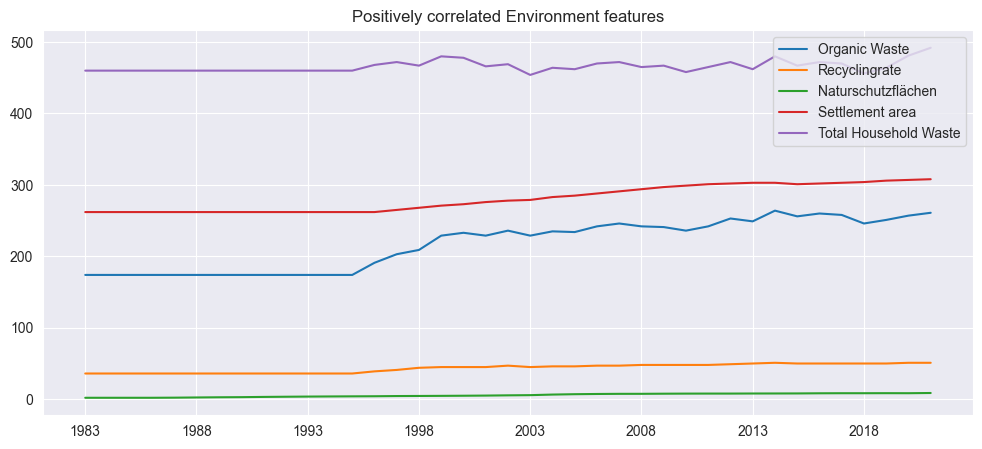

In [89]:
# Plotting Positively correlated indicators
plt.figure(figsize=(10, 10))
legends = formatted_cols[1:6]
df_t[temp_correlation_positive_cols].astype(float).plot(figsize=(12, 5))
plt.gca().legend(legends)
plt.title('Positively correlated Environment features')
plt.show()

## All the features except the Total Household waste and settlement area should have a positive effect on the environment
By studying the features it is fair to make the following assumptions
   1. Environmental protection efforts and awareness has helped in Increasing Recycling Rate
   2. Proper waste segregation has improved over the years leading to increase in Organic waster and decrease in other type of wastes
   3. Nature conservation has also seen an improvement over the years
   4. Total household waste has increased but organic wastes contributed to that increase as there is a reduction in other typf of household wastes
   5. There is an increase in settlement areas which could be a factor affecting climate change
   6. The above concluded correlation between the positive indicators and increase in temperature could be just because of the increasing trend in them over the years not because of any underlying positive correlated relationship

## Negatively Correlated Indicators

<Figure size 1000x1000 with 0 Axes>

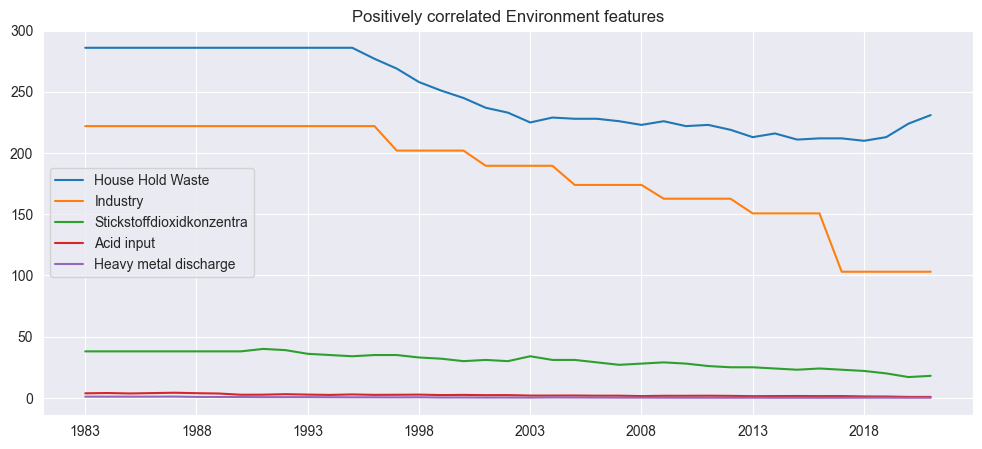

In [90]:
plt.figure(figsize=(10, 10))
legends = formatted_cols[-5:]
df_t[temp_correlation_negative_cols].astype(float).plot(figsize=(12, 5))
plt.gca().legend(legends)
plt.title('Positively correlated Environment features')
plt.show()

Similar to the positive correlation, the negative correlated feature also poses a surprising result
The features like Household Waste, nitrogen dioxide concentrate, Acid input, Heavy metal discharge and no2 emission adversely affects the climate change.
But it is shown to be negatively correlated.
We can  conclude that only the downward trend of the indicator over the years is the only correlation between climate data and these indicators

In [91]:
print(sorted_correlations.index.values)

['temperature--Temperature' 'household_waste--Organic Waste'
 'Recycling rate--Recyclingrate' 'Nature Conservation--Naturschutzflächen'
 'Settlement area--Settlement area'
 'household_waste--Total Household Waste'
 'greenhouse_gas--Product applications/other'
 'Nitrogen area balance--Moving average over 3 years'
 'Nitrogen area balance--Nitrogen area balance'
 'Land consumption--Settlement and traffic area '
 'greenhouse_gas--Energy industry' 'greenhouse_gas--Agriculture'
 'greenhouse_gas--Transport' 'o3-concentration-urban--Ozonkonzentration'
 'nitrogen_oxide_emission--Agriculture'
 'Nitrate concentration in groundwater--Percentage of monitoring sites with nitrate levels above 50 mg/l'
 'greenhouse_gas--Households / small-scale consumption'
 'nitrogen_input--Nitrogen input'
 'Particulate matter concentration PM10 : PM2.5 in the urban background--PM2.5'
 'nitrogen_oxide_emission--Traffic'
 'Particulate matter concentration PM10 : PM2.5 in the urban background--PM10'
 'greenhouse_gas--I

# Analysing the trend of Each environmental Indicators
The initial look at the features show interesting trends for different environmental indicators.
We can use linear Regression to quantify the trend for each indicator

In [173]:

df_trend = df_t.reset_index()

df_trend['index'] = pd.to_datetime(df_trend['index'])
df_trend.set_index('index', inplace=True)

x = np.arange(len(df_trend)).reshape(-1, 1)

trend_slope = []
for col in df_trend.columns:
    y = np.array(df_trend[col])
    model = LinearRegression()
    model.fit(x, y)
    slope = model.coef_[0]
    obj = {'name': col, 'slope': slope}
    trend_slope.append(obj)

trend_slope = sorted(trend_slope, key=lambda x: x['slope'], reverse=True)

# for var in trend_slope:
#     print(f"Trend slope for {var['name']}:")
#     print_colored(f"{var['slope']}", 'red')

## Analysing the Indicators with negative trends

In [175]:
for var in reversed(trend_slope[-5:]):
    print(f"Trend slope for {var['name']}:")
    print_colored(f"{var['slope']}", 'red')

Trend slope for nitrogen_oxide_emission--Traffic:
-4.760287449392714
Trend slope for nitrogen_oxide_emission--Industry:
-3.3079898785425117
Trend slope for household_waste--House Hold Waste:
-2.494534412955467
Trend slope for greenhouse_gas--Industry:
-1.2436842105263164
Trend slope for o3-concentration-urban--Ozonkonzentration:
-1.0180161943319843


## Nitrogen Oxide Emission

Nitrogen oxide emission is showing significant reduction trends over the years.
Nitrogen Oxide Emission is contributed by 4 factors
1. Industry
2. Small Combustion plants
3. Agriculture
4. Traffic

We try to understand the contribution of each sector to total nitrogen oxide emission.
We also  try to Identify which sector has the highest or lowest contribution and analyze any changes in their relative contributions over time.

In [303]:
df = pd.read_sql_table('env_indicators', 'sqlite:///../data/dataset.sqlite', coerce_float = True)
df_t= df.T
df_t = df_t.set_axis(df_t.iloc[0], axis=1).drop(df_t.index[0])

In [332]:
cols = df_t.columns.str.startswith('nitrogen_oxide_emission')
cols = df_t.columns[cols]
df_no2 = df_t[cols]
df_no2 = df_no2.dropna(axis=0)
df_no2['total_emissions']  = 0

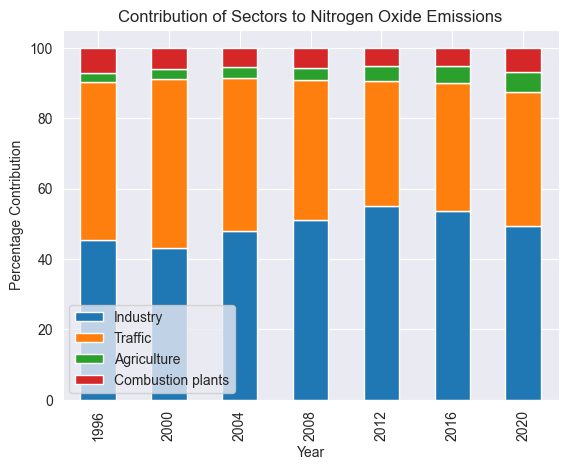

In [319]:

for col in cols:
    df_no2['total_emissions'] = df_no2['total_emissions'] + df_no2[col].astype(float)

# Calculate percentage contribution of each sector
df_no2['industry_contribution'] = (df_no2['nitrogen_oxide_emission--Industry'].astype(float) / df_no2['total_emissions']) * 100
df_no2['traffic_contribution'] = (df_no2['nitrogen_oxide_emission--Traffic'].astype(float) / df_no2['total_emissions']) * 100
df_no2['agriculture_contribution'] = (df_no2['nitrogen_oxide_emission--Agriculture'].astype(float) / df_no2['total_emissions']) * 100
df_no2['combustion_plants_contribution'] = (df_no2['nitrogen_oxide_emission--Small combustion plants'].astype(float) / df_no2['total_emissions']) * 100
#
# # Identify the highest and lowest contributions for each year
df_no2['highest_contribution_sector'] = df_no2[['industry_contribution', 'traffic_contribution', 'agriculture_contribution', 'combustion_plants_contribution']].idxmax(axis=1)
df_no2['lowest_contribution_sector'] = df_no2[['industry_contribution', 'traffic_contribution', 'agriculture_contribution', 'combustion_plants_contribution']].idxmin(axis=1)
#
# # Visualize the contributions over time
ax = df_no2[['industry_contribution', 'traffic_contribution', 'agriculture_contribution', 'combustion_plants_contribution']].plot(kind='bar', stacked=True)
new_legends = ['Industry', 'Traffic', 'Agriculture', 'Combustion plants']
ax.legend(new_legends)
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.title('Contribution of Sectors to Nitrogen Oxide Emissions')
plt.show()

In [323]:
print_colored(df_no2[['highest_contribution_sector', 'lowest_contribution_sector']], 'blue')

Type highest_contribution_sector lowest_contribution_sector
1996       industry_contribution   agriculture_contribution
2000        traffic_contribution   agriculture_contribution
2004       industry_contribution   agriculture_contribution
2008       industry_contribution   agriculture_contribution
2012       industry_contribution   agriculture_contribution
2016       industry_contribution   agriculture_contribution
2020       industry_contribution   agriculture_contribution


In most of the years, Industry was the most contributing factor with traffic closely following and Agriculture is the least contributor

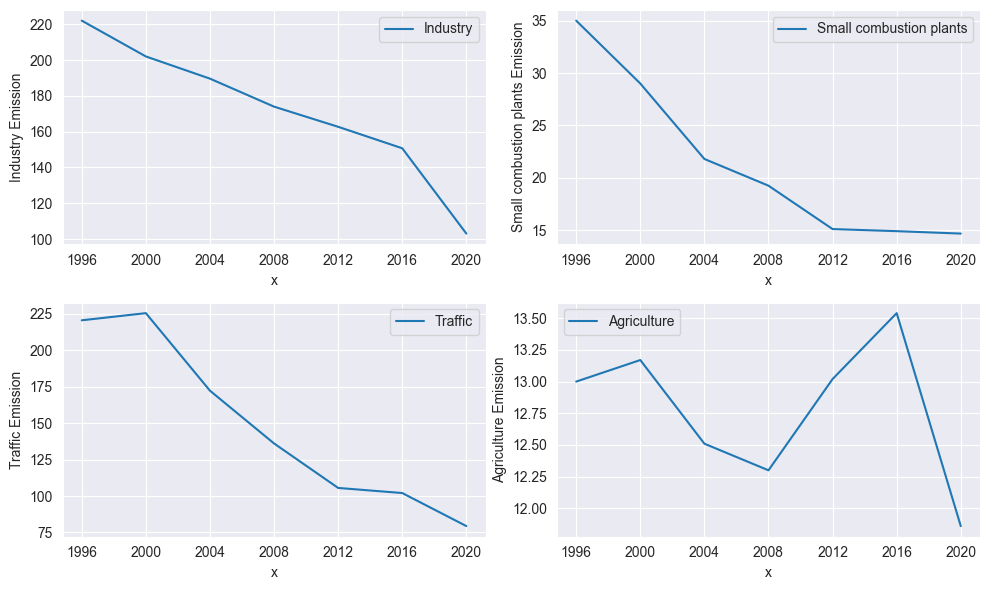

In [324]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, col_name in enumerate(cols.values):
    row = i // 2
    col = i % 2
    label = col_name.split('--')[-1]
    axes[row, col].plot(df_no2[col_name].astype(float), label=col_name.split('--')[-1])
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel(label + ' Emission')
    axes[row, col].legend()

plt.tight_layout()

plt.show()

Industry contributes maximum to total emission but it shows a rapid declining trend over the years.
The industrial emission decreased by about 112% from 1996-2020, which is a good achievement
The emission from Agriculture has meanwhile shows various trends with declining behavior in recent past but following the previous graph.
But its contribution is minimal to total emission

In [331]:
(df_no2['nitrogen_oxide_emission--Industry'].astype(float).iloc[-1] - df_no2['nitrogen_oxide_emission--Industry'].astype(float).iloc[0]*100/df_no2['nitrogen_oxide_emission--Industry'].astype(float).iloc[-1])

-112.37940320232899

## Green house Gases

In [341]:
cols = df_t.columns.str.startswith('greenhouse_gas')
cols = df_t.columns[cols]
df_green = df_t[cols].dropna()

In [338]:
df_green.describe()

Type,greenhouse_gas--Energy industry,greenhouse_gas--Industry,greenhouse_gas--Transport,greenhouse_gas--Households / small-scale consumption,greenhouse_gas--Fl. emissions from fuels,greenhouse_gas--Product applications/other,greenhouse_gas--Agriculture,greenhouse_gas--Waste
count,20,20,20,20,20,20,20,20
unique,20,18,20,19,17,9,9,13
top,159.4,54.7,36.2,28.6,1.9,3.6,7.2,0.5
freq,1,2,1,2,2,6,5,4


In [339]:
df_green.plot()

TypeError: no numeric data to plot

In [342]:
df_green

Type,greenhouse_gas--Energy industry,greenhouse_gas--Industry,greenhouse_gas--Transport,greenhouse_gas--Households / small-scale consumption,greenhouse_gas--Fl. emissions from fuels,greenhouse_gas--Product applications/other,greenhouse_gas--Agriculture,greenhouse_gas--Waste
1990,159.4,94.3,36.2,37.3,23.4,3.5,7.7,5.2
1995,164.8,80.1,38.3,43.6,17.6,4.3,7.2,3.7
2000,159.2,70.8,39.8,40.9,14.1,3.6,6.9,2.4
2005,174.4,62.7,36.7,35.7,7.1,3.6,6.7,1.8
2006,179.4,63.5,36.1,37.8,6.4,3.7,6.4,1.5
2007,185.6,62.4,35.1,29.7,6.2,3.6,6.5,1.2
2008,176.2,60.3,35.0,37.5,6.1,3.6,6.6,1.1
2009,157.6,47.5,34.5,34.8,4.5,3.6,6.8,1.0
2010,167.2,57.0,32.6,33.4,4.3,3.6,6.6,0.9
2011,166.6,55.3,33.0,28.6,4.1,3.7,6.6,0.9
